In [18]:
import pywt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Creat a little Dataset for first test and gain time

In [19]:
df_train = pd.read_csv('./data/fashion-mnist_train.csv')
df_test = pd.read_csv('./data/fashion-mnist_test.csv')

In [20]:
label_train = df_train['label']
data_train = df_train.drop('label', axis=1) / 255
data_test = df_test.drop('label', axis=1) / 255
label_test = df_test['label']

In [21]:
label_tain.shape

(60000,)

In [22]:
data_train.shape

(60000, 784)

In [23]:
label_test.shape

(10000,)

In [24]:
data_test.shape

(10000, 784)

In [25]:
def extract_wavelet_features(data):
    features = []
    for i in range(len(data)):
        # Reshape la ligne complète (784 pixels) en image 28x28
        image = data.iloc[i].values.reshape(28, 28)

        # Applique la transformation wavelet
        LL, (LH, HL, HH) = pywt.dwt2(image, 'bior1.3')

        # Concatène les coefficients en 1D
        feature = np.concatenate([LL.ravel(), LH.ravel(), HL.ravel(), HH.ravel()])
        features.append(feature)

    return np.array(features)

# Utilisation
features = extract_wavelet_features(data_train)
features_test = extract_wavelet_features(data_test)

# Try XGBoost models with ondelette

In [26]:
model = SVC(C=100, kernel='poly')
model.fit(features, label_tain)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",100
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [27]:
prediction = model.predict(features_test)

In [28]:
model.score(features_test, label_test)

0.8937

In [29]:
matrice = confusion_matrix(label_test, prediction)

In [30]:
print(classification_report(label_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.98      0.99      0.99      1000
           2       0.81      0.81      0.81      1000
           3       0.91      0.91      0.91      1000
           4       0.86      0.82      0.84      1000
           5       0.95      0.95      0.95      1000
           6       0.76      0.72      0.74      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



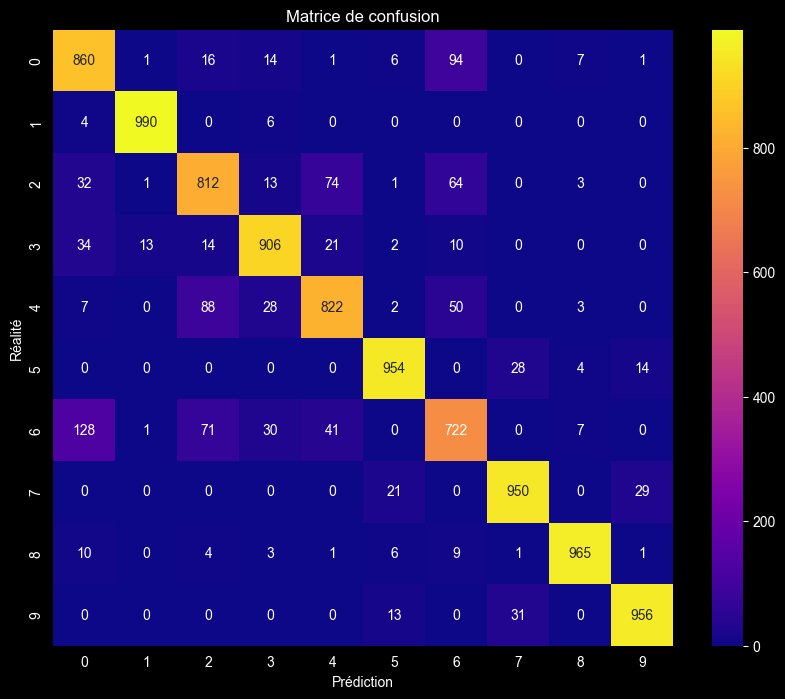

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrice, annot=True, fmt='d', cmap='plasma',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()

In [35]:
params = {
'C':[1,10,100,1000],
'kernel':['poly','linear'],
}

In [36]:
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    verbose= 1,
    cv=5,
    scoring='accuracy',
)

In [37]:
grid.fit(features, label_tain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
# Meilleurs paramètres trouvés
print(grid.best_params_)

# Meilleur score en validation croisée
print(grid.best_score_)

# Meilleur modèle (déjà entraîné)
best_model = grid.best_estimator_